# Library & Read Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('jam_belajar_nilai_ujian_1000.csv')

# Data Cleaning

In [4]:
df.head(5)

,Jam_Belajar,Nilai_Ujian
0,5,60
1,10,85
2,3,55
3,8,70
4,15,95


In [5]:
df.shape

(1000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Jam_Belajar  1000 non-null   int64
 1   Nilai_Ujian  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Jam_Belajar    0
Nilai_Ujian    0
dtype: int64


In [8]:
df.describe()

,Jam_Belajar,Nilai_Ujian
count,1000.000000,1000.00000
mean,9.636000,92.29300
std,5.520687,28.87842
min,1.000000,35.00000
25%,5.000000,68.00000
50%,9.000000,91.00000
75%,15.000000,116.00000
max,19.000000,154.00000


In [9]:
df.dropna(inplace=True)
df.count()

Jam_Belajar    1000
Nilai_Ujian    1000
dtype: int64

#Pre Processing

In [10]:
dfpp = df.copy()

In [11]:
dfpp.head(5)

,Jam_Belajar,Nilai_Ujian
0,5,60
1,10,85
2,3,55
3,8,70
4,15,95


In [12]:
print(dfpp.columns.tolist())

['Jam_Belajar', 'Nilai_Ujian']


In [13]:
dfpp.columns = dfpp.columns.str.strip()

dfpp.rename(columns={
    'Jam_Belajar': 'Durasi',
    'Nilai_Ujian': 'Nilai'
}, inplace=True)
print(dfpp.columns)

dfpp

Index(['Durasi', 'Nilai'], dtype='object')


,Durasi,Nilai
0,5,60
1,10,85
2,3,55
3,8,70
4,15,95
...,...,...
995,9,87
996,9,82
997,10,108
998,9,97


In [14]:
dfpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Durasi  1000 non-null   int64
 1   Nilai   1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [17]:
pip install plotly


  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.13.0-py3-none-any.whl.metadata (12 kB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)
Using cached narwhals-2.13.0-py3-none-any.whl (426 kB)

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhal


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import plotly.express as px

# Membuat box plot untuk Jam Belajar
fig1 = px.box(dfpp, y='Durasi', points='all')
fig1.update_layout(
    title='Distribusi Jumlah Jam Belajar per Minggu',
    title_x=0.5,
    yaxis_title='Jumlah Jam Belajar'
)
fig1.show()

# Membuat box plot untuk Nilai Ujian
fig2 = px.box(dfpp, y='Nilai', points='all')
fig2.update_layout(
    title='Distribusi Nilai Ujian Matematika',
    title_x=0.5,
    yaxis_title='Nilai Ujian Matematika'
)
fig2.show()

In [19]:
fig = px.scatter(x=dfpp['Durasi'], y=dfpp['Nilai'])
fig.update_layout(
    title='Hubungan Antara Jam Belajar dan Nilai Ujian Matematika',
    title_x=0.5,
    xaxis_title='Jumlah Jam Belajar per Minggu',
    yaxis_title='Nilai Ujian Matematika',
    height=500,
    width=700
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

# MODEL Regression Linear

In [23]:
pip install scikit-learn


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 4.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 5.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 5.3 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.3 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.6 MB 7.2 MB/s eta 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    confusion_matrix,
    classification_report
)


In [25]:
x = dfpp[['Durasi']]
y = dfpp['Nilai']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
# Membuat dan melatih model regresi linier
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [28]:
y_pred = model.predict(x_test)

In [29]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 84.21263327816165
RMSE: 9.176744154555125


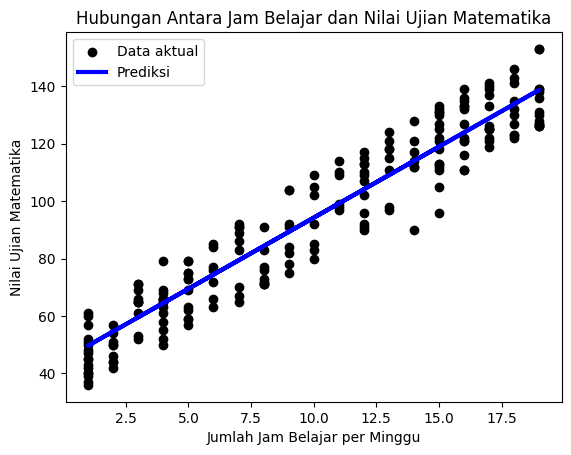

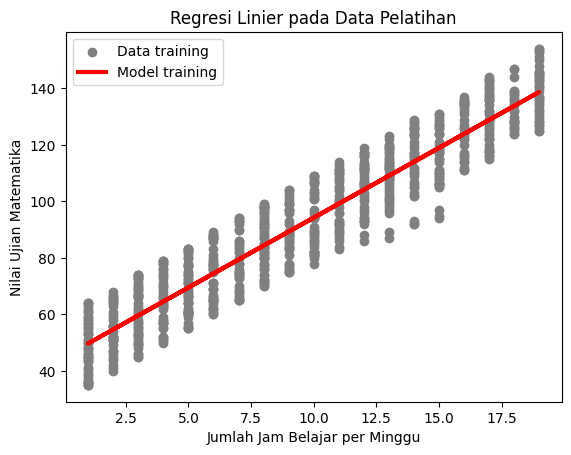

In [30]:
# Scatter plot data aktual vs prediksi
plt.scatter(x_test, y_test, color='black', label='Data aktual')
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Prediksi')
plt.xlabel('Jumlah Jam Belajar per Minggu')
plt.ylabel('Nilai Ujian Matematika')
plt.title('Hubungan Antara Jam Belajar dan Nilai Ujian Matematika')
plt.legend()
plt.show()

# Visualisasi regresi linier pada data pelatihan
plt.scatter(x_train, y_train, color='gray', label='Data training')
plt.plot(x_train, model.predict(x_train), color='red', linewidth=3, label='Model training')
plt.xlabel('Jumlah Jam Belajar per Minggu')
plt.ylabel('Nilai Ujian Matematika')
plt.title('Regresi Linier pada Data Pelatihan')
plt.legend()
plt.show()

In [32]:
import pickle

In [33]:
filename = 'analisis_nilai_jam_belajar_model.sav'
pickle.dump(model, open(filename, 'wb'))